# Analysis

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
v = 'v7'
input_data = pd.read_csv(f'{v}/log_MyInput.csv')
preprocess_data = pd.read_csv(f'{v}/log_MyPreprocess.csv')
cloud_data = pd.read_csv(f'{v}/log_MyCloud.csv')
jetson_data = pd.read_csv(f'{v}/log_MyJetson.csv')
forwarder_data = pd.read_csv(f'{v}/log_MyForwarder.csv')
merger_data = pd.read_csv(f'{v}/log_MyMerger.csv')

## Input

In [45]:
input_data

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/08 10:08:24.379,MyInput,None,input,1,-1,-1,42.33,42.33,921.74,0.01,921.76,28.24,1070
1,2022/06/08 10:08:24.437,MyInput,None,input,2,-1,-1,41.43,41.43,921.74,0.01,921.76,37.31,1096
2,2022/06/08 10:08:24.488,MyInput,None,input,3,-1,-1,47.52,47.52,921.74,0.02,921.76,35.79,1071
3,2022/06/08 10:08:24.565,MyInput,None,input,4,-1,-1,49.25,49.25,921.74,0.01,921.76,58.57,1072
4,2022/06/08 10:08:24.634,MyInput,None,input,5,-1,-1,50.15,50.15,921.74,0.01,921.76,71.55,1097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,2022/06/08 10:11:38.369,MyInput,None,input,2295,-1,-1,0.02,0.02,921.74,0.01,921.76,507.12,2276
2297,2022/06/08 10:11:38.387,MyInput,None,input,2299,-1,-1,47.23,47.23,921.74,0.02,921.76,134.61,2186
2298,2022/06/08 10:11:38.597,MyInput,None,input,2296,-1,-1,0.02,0.02,921.74,0.01,921.76,592.08,2277
2299,2022/06/08 10:11:38.729,MyInput,None,input,2300,-1,-1,52.97,52.97,921.74,0.02,921.76,419.01,2278


In [56]:
input_consume_process_send = input_data[['consume time', 'process time', 'send time']]
input_consume_process_send

,consume time,process time,send time
0,42.33,0.01,28.24
1,41.43,0.01,37.31
2,47.52,0.02,35.79
3,49.25,0.01,58.57
4,50.15,0.01,71.55
...,...,...,...
2296,0.02,0.01,507.12
2297,47.23,0.02,134.61
2298,0.02,0.01,592.08
2299,52.97,0.02,419.01


In [60]:
input_consume_process_send.mean()

consume time     20.133659
process time      0.020009
send time       267.282516
dtype: float64

## Preprocess

In [46]:
preprocess_data

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/08 10:04:30.481,MyPreprocess,input,preprocess,2,689,266.31,271.61,34835.53,921.74,54.31,307.36,1672.37,0
1,2022/06/08 10:04:31.312,MyPreprocess,input,preprocess,5,690,260.01,260.66,70.83,921.74,4.80,307.36,2409.82,1
2,2022/06/08 10:04:32.154,MyPreprocess,input,preprocess,6,691,299.92,300.70,77.15,921.74,4.56,307.36,3158.15,2
3,2022/06/08 10:04:32.986,MyPreprocess,input,preprocess,21,699,928.31,773.56,0.05,921.74,4.93,307.36,2478.61,3
4,2022/06/08 10:04:33.838,MyPreprocess,input,preprocess,34,703,582.51,583.61,0.05,921.74,3.84,307.36,2493.78,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2022/06/08 10:11:38.422,MyPreprocess,input,preprocess,2267,2263,578.43,442.75,0.05,921.74,4.54,307.36,2462.57,323
324,2022/06/08 10:11:39.248,MyPreprocess,input,preprocess,2282,2268,540.94,541.77,0.05,921.74,4.83,307.36,2457.89,324
325,2022/06/08 10:11:40.079,MyPreprocess,input,preprocess,2286,2271,1079.33,941.33,0.04,921.74,3.83,307.36,2465.00,325
326,2022/06/08 10:11:40.905,MyPreprocess,input,preprocess,2294,2275,679.74,577.59,0.04,921.74,4.42,307.36,2459.32,326


In [63]:
preprocess_consume_process_send = preprocess_data[['consume time', 'process time', 'send time']].drop(0)
preprocess_consume_process_send

,consume time,process time,send time
1,70.83,4.80,2409.82
2,77.15,4.56,3158.15
3,0.05,4.93,2478.61
4,0.05,3.84,2493.78
5,0.04,4.25,2492.67
...,...,...,...
323,0.05,4.54,2462.57
324,0.05,4.83,2457.89
325,0.04,3.83,2465.00
326,0.04,4.42,2459.32


In [66]:
preprocess_consume_process_send.mean()

consume time     492.119572
process time       5.024220
send time       2465.293242
dtype: float64

## Cloud

In [47]:
cloud_data

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/08 03:04:31.572,MyCloud,preprocess,result,5,1,2600.57,2334.25,877.71,307.33,308.19,0.32,23.65,0
1,2022/06/08 03:04:32.203,MyCloud,preprocess,result,6,2,3382.22,1578.91,506.80,307.33,128.11,0.32,5.81,1
2,2022/06/08 03:04:33.056,MyCloud,preprocess,result,21,3,3325.77,1574.91,693.33,307.33,147.58,0.32,12.94,2
3,2022/06/08 03:04:33.866,MyCloud,preprocess,result,34,4,2987.52,1570.52,685.27,307.33,128.58,0.32,5.51,3
4,2022/06/08 03:04:34.759,MyCloud,preprocess,result,38,5,3657.34,1588.60,716.64,307.33,163.99,0.32,11.92,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2022/06/08 03:11:38.469,MyCloud,preprocess,result,2267,323,2961.55,1559.71,710.14,307.33,126.41,0.32,10.16,322
323,2022/06/08 03:11:39.279,MyCloud,preprocess,result,2282,324,2919.63,1561.31,695.44,307.33,115.02,0.32,4.68,323
324,2022/06/08 03:11:40.140,MyCloud,preprocess,result,2286,325,3463.86,1561.75,711.77,307.33,139.10,0.32,10.46,324
325,2022/06/08 03:11:40.935,MyCloud,preprocess,result,2294,326,3058.97,1559.71,681.29,307.33,114.88,0.32,4.79,325


In [67]:
cloud_consume_process_send = cloud_data[['consume time', 'process time', 'send time']].drop(0)
cloud_consume_process_send

,consume time,process time,send time
1,506.80,128.11,5.81
2,693.33,147.58,12.94
3,685.27,128.58,5.51
4,716.64,163.99,11.92
5,683.24,146.32,7.01
...,...,...,...
322,710.14,126.41,10.16
323,695.44,115.02,4.68
324,711.77,139.10,10.46
325,681.29,114.88,4.79


In [70]:
cloud_consume_process_send.mean()

consume time    1183.810798
process time     131.062331
send time          7.831871
dtype: float64

## Jetson Nano

In [48]:
jetson_data

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/08 03:04:39.808,MyJetson,input,result,1,675,140.81,153.41,203909.30,921.73,10726.12,361.25,297.10,298
1,2022/06/08 03:04:39.960,MyJetson,input,result,128,740,662.67,662.82,0.07,921.73,104.38,361.18,203.95,299
2,2022/06/08 03:04:40.077,MyJetson,input,result,133,742,363.46,364.08,0.05,921.73,97.69,360.74,200.03,300
3,2022/06/08 03:04:40.998,MyJetson,input,result,141,743,123.49,123.82,697.80,921.73,207.97,361.13,187.85,301
4,2022/06/08 03:04:41.108,MyJetson,input,result,143,745,270.44,271.03,0.05,921.73,119.53,361.20,154.18,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2022/06/08 03:11:38.293,MyJetson,input,result,2293,2183,137.11,137.93,263.52,921.73,99.36,360.92,316.71,1848
1294,2022/06/08 03:11:38.444,MyJetson,input,result,2297,2184,72.36,73.08,256.66,921.73,84.58,361.16,100.40,1849
1295,2022/06/08 03:11:38.540,MyJetson,input,result,2298,2185,162.41,162.95,12.79,921.73,96.93,360.97,61.92,1850
1296,2022/06/08 03:11:38.640,MyJetson,input,result,2299,2186,229.34,230.25,0.06,921.73,71.09,361.28,66.96,1852


In [71]:
jetson_consume_process_send = jetson_data[['consume time', 'process time', 'send time']].drop(0)
jetson_consume_process_send

,consume time,process time,send time
1,0.07,104.38,203.95
2,0.05,97.69,200.03
3,697.80,207.97,187.85
4,0.05,119.53,154.18
5,1139.63,184.48,204.47
...,...,...,...
1293,263.52,99.36,316.71
1294,256.66,84.58,100.40
1295,12.79,96.93,61.92
1296,0.06,71.09,66.96


In [74]:
jetson_consume_process_send.mean()

consume time    205.846037
process time     90.922143
send time       129.615382
dtype: float64

## Forwarder

In [49]:
forwarder_data

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/08 10:08:25.708,MyForwarder,result,result,2,90,1279.74,-220.19,140295.08,0.12,0.02,0.32,23.22,644
1,2022/06/08 10:08:26.381,MyForwarder,result,result,5,91,1808.07,-326.78,678.88,0.12,0.04,0.32,8.64,650
2,2022/06/08 10:08:27.358,MyForwarder,result,result,6,92,2713.47,-197.80,957.81,0.12,0.01,0.32,24.13,656
3,2022/06/08 10:08:28.065,MyForwarder,result,result,18,93,2759.37,-326.03,703.13,0.12,0.01,0.32,23.74,659
4,2022/06/08 10:08:29.014,MyForwarder,result,result,34,94,2676.87,-185.50,947.99,0.12,0.01,0.32,22.04,663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2022/06/08 10:11:38.139,MyForwarder,result,result,2267,322,2762.87,-325.99,676.86,0.12,0.01,0.32,5.87,1851
233,2022/06/08 10:11:39.110,MyForwarder,result,result,2282,323,2868.21,-167.16,971.12,0.12,0.01,0.32,3.49,1854
234,2022/06/08 10:11:39.817,MyForwarder,result,result,2286,324,3279.47,-324.67,695.98,0.12,0.01,0.32,11.23,1855
235,2022/06/08 10:11:40.770,MyForwarder,result,result,2294,325,3009.42,-165.89,956.24,0.12,0.01,0.32,4.36,1856


In [75]:
forwarder_consume_process_send = forwarder_data[['consume time', 'process time', 'send time']].drop(0)
forwarder_consume_process_send

,consume time,process time,send time
1,678.88,0.04,8.64
2,957.81,0.01,24.13
3,703.13,0.01,23.74
4,947.99,0.01,22.04
5,682.40,0.01,17.85
...,...,...,...
232,676.86,0.01,5.87
233,971.12,0.01,3.49
234,695.98,0.01,11.23
235,956.24,0.01,4.36


In [78]:
forwarder_consume_process_send.mean()

consume time    825.694576
process time      0.011568
send time        22.593136
dtype: float64

## Merger

In [44]:
merger_data

,asctime,name,topic from,topic to,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
0,2022/06/08 10:08:24.039,MyMerger,input,final_cam_1,1,1070,-370.32,-367.77,137317.19,921.74,0.01,921.76,51.76,1062
1,2022/06/08 10:08:24.119,MyMerger,input,final_cam_1,3,1071,-361.62,-361.23,99.52,921.74,0.01,921.76,25.72,1063
2,2022/06/08 10:08:24.201,MyMerger,input,final_cam_1,4,1072,-346.72,-346.62,63.54,921.74,0.01,921.76,39.1,1064
3,2022/06/08 10:08:24.287,MyMerger,input,final_cam_1,2,1096,-143.21,-142.43,89.11,921.74,0.01,921.76,28.63,1065
4,2022/06/08 10:08:24.340,MyMerger,input,final_cam_1,7,1073,-358.14,-357.75,54.29,921.74,0.01,921.76,23.28,1066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,2022/06/08 10:11:39.114,MyMerger,result,final_cam_1,2282,1854,2872.71,4.35,466.06,0.12,0.01,0.32,3.13,4183
3122,2022/06/08 10:11:39.831,MyMerger,result,final_cam_1,2286,1855,3292.53,12.4,704.14,0.12,0.01,0.32,13.0,4184
3123,2022/06/08 10:11:40.773,MyMerger,result,final_cam_1,2294,1856,3014.53,4.23,947.49,0.12,0.01,0.32,3.81,4185
3124,2022/06/08 10:11:41.527,MyMerger,result,final_cam_1,2301,1857,3132.59,70.35,745.48,0.12,0.01,0.32,9.21,4186


In [34]:
merger_data.describe()

,frame,offset received,frame delay,msg creation delay,consume time,size data received,process time,size data sent,send time,offset sent
count,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000,3125.000000
mean,1145.665920,1495.599360,857.417011,510.241232,96.768781,674.737952,0.014416,674.783325,45.687520,2624.000000
std,665.507423,396.528491,1323.188504,1077.869828,2456.378420,320.549565,0.039081,320.509350,47.057079,902.254122
min,1.000000,634.000000,-388.540000,-387.690000,0.050000,0.120000,0.010000,0.320000,3.130000,1062.000000
25%,571.000000,1209.000000,-249.130000,-257.440000,0.390000,361.010000,0.010000,361.070000,23.170000,1843.000000
50%,1140.000000,1504.000000,439.470000,146.600000,35.380000,921.740000,0.010000,921.760000,32.310000,2624.000000
75%,1715.000000,1794.000000,1416.330000,736.140000,79.740000,921.740000,0.010000,921.760000,48.510000,3405.000000
max,2303.000000,2279.000000,6086.910000,5984.380000,137317.190000,921.740000,1.480000,921.760000,701.870000,4186.000000


In [35]:
merger_data.loc['asctime'] =  pd.to_datetime(
    merger_data['asctime'], format='%Y-%m-%d %H:%M:%S.%f')

## Analyze the inference result from cloud to local

In [36]:
# only duped means that a frame has its inference result
# whether it's from cloud or jetson-nano
merger_data_has_inference = merger_data[merger_data.duplicated('frame',keep=False)].copy()

In [37]:
merger_data_has_inference['delay input inference'] = None
merger_data_has_inference['type'] = None
merger_data_has_inference_grouped = merger_data_has_inference.groupby(by='frame')

In [38]:
def group_inference_type(x, **kwargs):
    if len(x) != 2: return None
    _from_input = x['topic from'] == 'input'
    from_input = x[_from_input].iloc[0]
    inference = x[~_from_input].iloc[0]
    _type = 'jetson' if inference['size data received'] > 300 else 'cloud'
    diff = inference['frame delay'] - from_input['frame delay']
    res = x.iloc[0].copy()
    res['delay input inference'] = diff
    res['type'] = _type
    return res[['frame','type','delay input inference']]

a = merger_data_has_inference_grouped.agg(group_inference_type, axis=1).dropna(axis=1)

In [39]:
a

,delay input inference,type
frame,,
1,745.21,jetson
2,2131.16,cloud
4,932.09,jetson
5,2579.42,cloud
6,2982.84,cloud
...,...,...
2297,264.33,jetson
2298,217.02,jetson
2299,500.84,jetson


<AxesSubplot:ylabel='Frequency'>

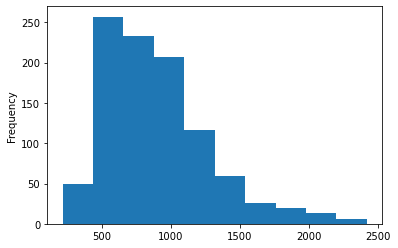

In [40]:
a[a['type'] == 'jetson']['delay input inference'].plot(kind='hist')

In [42]:
a.describe()

,delay input inference
count,1144.000000
mean,979.184423
std,624.687616
min,-2046.090000
25%,618.190000
50%,865.345000
75%,1194.535000
max,4091.810000


In [43]:
a.groupby('type').mean()

,delay input inference
type,
cloud,1483.522675
jetson,898.960405
